<a href="https://colab.research.google.com/github/Sophiat-O/c02_emission_analysis/blob/test/%5BProject_AI%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("https://www.nrcan.gc.ca/sites/nrcan/files/oee/files/csv/MY2021%20Fuel%20Consumption%20Ratings.csv", header=[0, 1], encoding="latin-1")
df = df.dropna(subset=[("Model", "Unnamed: 2_level_1")]).dropna(axis=1)

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Model,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,CO2 Emissions,CO2,Smog
,Year,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,(L),Unnamed: 5_level_1,Unnamed: 6_level_1,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
0,2021,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33.0,199.0,6.0,3.0
1,2021,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11.0,26.0,256.0,4.0,3.0
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2021,Acura,TLX SH-AWD,Compact,2.0,4.0,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


In [ ]:
df.columns = [
  "year", "brand", "model", "vehicle_class", "engine_size", "cylinders", "transmission", "fuel_type", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_emissions", "co2_rating", "smog_rating"
]

In [ ]:
df.shape
df['transmission'] = df['transmission'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
list(df)

['year',
 'brand',
 'model',
 'vehicle_class',
 'engine_size',
 'cylinders',
 'transmission',
 'fuel_type',
 'fuel_consumption',
 'Hwy',
 'Comb',
 'Comb_mpg',
 'co2_emissions',
 'co2_rating',
 'smog_rating']

In [ ]:
# df.columns = ["year", "vehicle_brand", "vehicle_model", "vehicle_class", "motor_kW", "engine_size_L", "cylinders", "transmission", "fuel_type", "consumption_combined_le/100km", "range_1_h", "recharge_time_h", "fuel_type_2", "consumption_city_L/100km", "Hwy_L/100km", "Comb_L/100km", "Range_2_km", "co2_emissions_g/km"]

In [ ]:
# df = pd.read_csv("https://www.nrcan.gc.ca/sites/nrcan/files/oee/files/csv/MY2012-2021%20Plug-in%20Hybrid%20Electric%20Vehicles.csv", header=[0, 1], encoding="latin-1")
# df = df.dropna(subset=[("Motor", "(kW)")]).dropna(axis=1)
# df.head()

In [ ]:
df.head()

,year,brand,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption,Hwy,Comb,Comb_mpg,co2_emissions,co2_rating,smog_rating
0,2021,Acura,ILX,Compact,2.4,4.0,AM,Z,9.9,7.0,8.6,33.0,199.0,6.0,3.0
1,2021,Acura,NSX,Two-seater,3.5,6.0,AM,Z,11.1,10.8,11.0,26.0,256.0,4.0,3.0
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4.0,AS,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2021,Acura,TLX SH-AWD,Compact,2.0,4.0,AS,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


In [ ]:
df.shape

(935, 15)

In [ ]:
df['fuel_type'] = df['fuel_type'].str.replace("Z", "Premium Gasoline")
df['fuel_type'] = df['fuel_type'].str.replace("X", "Regular Gasoline")
df['fuel_type'] = df['fuel_type'].str.replace("D", "Diesel")
df['fuel_type'] = df['fuel_type'].str.replace("E", "Ethanol(E85)")
df['fuel_type'] = df['fuel_type'].str.replace("N", "Natural Gas")

In [ ]:
dd = df.groupby(["brand", "fuel_type"]).agg({"year": "count"})
dd['percent'] = dd.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
dd = dd.reset_index()
dd

In [ ]:
#Clean up transmission data by replacing the interger with string enum
df['transmission'] = df['transmission'].str.replace('\d+', '')

#replace transmission string enum with full name
df["transmission"] = np.where(df["transmission"]=="A", "Automatic", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AM", "Automated Manual", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AS", "Automatic with Select Shift", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AV", "Continuously Variable", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="M", "Manual", df["transmission"])


In [ ]:
#calculating the percentage transimission type by brand 

tr = df.groupby(["brand", "transmission"]).agg({"year": "count"})
tr['percent'] = tr.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
tr = tr.reset_index()
tr

In [ ]:
sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

tr_chart = tr.pivot(index="brand", columns="transmission", values="percent")
tr_chart = tr_chart.reindex(brand.value_counts().index, axis=0)
g = tr_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86","#223F28"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.title("Percentage transmission type by brand", fontsize=15)
plt.margins(x=0)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

In [ ]:
vc = df.groupby(["vehicle_class", "transmission"]).agg({"year": "count"})
vc['percent'] = vc.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
vc = vc.reset_index()
vc

In [ ]:
vc_fuel = df.groupby(["vehicle_class", "fuel_type"]).agg({"year": "count"})
vc_fuel['percent'] = vc_fuel.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
vc_fuel = vc_fuel.reset_index()
vc_fuel

In [ ]:
sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

vc_fuel_chart = vc_fuel.pivot(index="vehicle_class", columns="fuel_type", values="percent")
vc_fuel_chart = vc_fuel_chart.reindex(df["vehicle_class"].value_counts().index, axis=0)
g = vc_fuel_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86","#223F28"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.title("Percentage fuel type by vehicle class", fontsize=15)
plt.margins(x=0)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

In [ ]:
sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

vc_chart = vc.pivot(index="vehicle_class", columns="transmission", values="percent")
vc_chart = vc_chart.reindex(df["vehicle_class"].value_counts().index, axis=0)
g = vc_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86","#223F28"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.title("Percentage transmission type by vehicle class", fontsize=15)
plt.margins(x=0)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

In [ ]:
sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

df_chart = dd.pivot(index="brand", columns="fuel_type", values="percent")
df_chart = df_chart.reindex(brand.value_counts().index, axis=0)
g = df_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.margins(x=0)
plt.title("Percent of Fuel Type by Brand", fontsize=15)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

In [ ]:
sns.set(rc = {'figure.figsize':(25,15)})
sns.countplot(y="brand", data=df, color="#65BF8F",order = brand.value_counts().index)
plt.title("Brand Count", fontsize=15)

In [ ]:
sns.set(rc = {'figure.figsize':(12,10)})
tr_count = df.groupby("transmission")["transmission"].count().sort_values(ascending=False)
#tr_count.plot(kind="bar", color="#65BF8F")
sns.countplot(y=df["transmission"], data=df, color="#65BF8F",order = df["transmission"].value_counts().index)
plt.title("Transmission Count", fontsize=22)
plt.ylabel("Tranmission Type", fontsize=20)
plt.xlabel("Count", fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
print(tr_count)
plt.show()

In [ ]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_count = df.groupby("fuel_type")["fuel_type"].count().sort_values(ascending=False)
#ft_count.plot(kind="bar", color="#65BF8F")
sns.countplot(x=df["fuel_type"], data=df, color="#65BF8F",order = df["fuel_type"].value_counts().index)
plt.title("Fuel Type Count", fontsize=22)
plt.ylabel("Count", fontsize=20)
plt.xlabel("Fuel Type", fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
print(ft_count)
plt.show()

In [ ]:
emission_transmission = df.groupby(["transmission"])["co2_emissions"].mean().sort_values().reset_index()

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(y = "transmission",x="co2_emissions", data = df, color="#65BF8F", order = list(emission_transmission["transmission"])) #  palette=sns.light_palette("seagreen", reverse=True) color="#24D139",
plt.title('CO₂ Emissions with Transmission', fontsize=22)
plt.xlabel('\nCO₂ Emissions', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Transmission', fontsize=20)

In [ ]:
emission_fuel = df.groupby(["fuel_type"])["co2_emissions"].mean().sort_values().reset_index()

sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x = "fuel_type",y="co2_emissions", order=list(emission_fuel["fuel_type"]), color="#65BF8F", data = df) # palette=sns.dark_palette("seagreen", reverse=True)
plt.title('CO₂ Emissions with fuel type', fontsize=22)
plt.xlabel('\nFuel Type', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('CO₂ Emissions', fontsize=20)

In [ ]:
dd = df[["engine_size", "cylinders", "transmission", "fuel_type", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_emissions", "co2_rating", "smog_rating"]]
dd.corr()

,engine_size,cylinders,fuel_consumption,Hwy,Comb,Comb_mpg,co2_emissions,co2_rating,smog_rating
engine_size,1.000000,0.918483,0.833345,0.748928,0.817541,-0.707183,0.825725,-0.781292,-0.504544
cylinders,0.918483,1.000000,0.842551,0.742968,0.821770,-0.694915,0.834972,-0.770964,-0.532742
fuel_consumption,0.833345,0.842551,1.000000,0.926625,0.991267,-0.905265,0.966137,-0.922594,-0.573210
Hwy,0.748928,0.742968,0.926625,1.000000,0.967835,-0.883300,0.933468,-0.895023,-0.490750
Comb,0.817541,0.821770,0.991267,0.967835,1.000000,-0.912985,0.971241,-0.928887,-0.555426
Comb_mpg,-0.707183,-0.694915,-0.905265,-0.883300,-0.912985,1.000000,-0.909713,0.949028,0.519362
co2_emissions,0.825725,0.834972,0.966137,0.933468,0.971241,-0.909713,1.000000,-0.957189,-0.583690
co2_rating,-0.781292,-0.770964,-0.922594,-0.895023,-0.928887,0.949028,-0.957189,1.000000,0.555065
smog_rating,-0.504544,-0.532742,-0.573210,-0.490750,-0.555426,0.519362,-0.583690,0.555065,1.000000


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


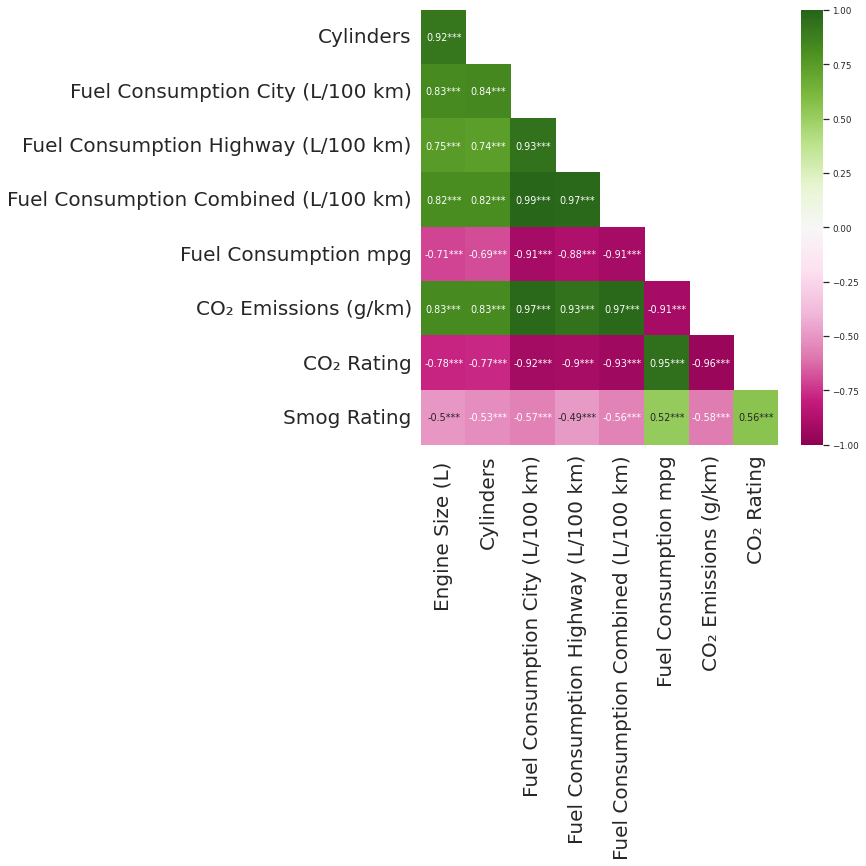

In [ ]:
corr_m = dd.corr()

rho = dd.corr()
pval = dd.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x<=t]))
p = rho.round(2).astype(str) + p

p = np.tril(p.values, k=-1)

p[p==0] = np.nan
p = pd.DataFrame(p).dropna(axis=0, how="all").dropna(axis=1, how="all")

# np.fill_diagonal(corr_m.values, np.nan)
labels_m = ['Engine Size (L) ', 'Cylinders', 'Fuel Consumption City (L/100 km)','Fuel Consumption Highway (L/100 km)','Fuel Consumption Combined (L/100 km)' ,'Fuel Consumption mpg','CO₂ Emissions (g/km)','CO₂ Rating','Smog Rating']
corr_m = np.tril(corr_m.values, k=-1)

corr_m[corr_m==0] = np.nan

heatmap_data = pd.DataFrame(corr_m, index=labels_m, columns=labels_m).round(2)\
                .dropna(axis=0, how="all")\
                .dropna(axis=1, how="all")

sns.set(font_scale=0.8, rc={"figure.figsize": (8, 8)}, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rc("grid", color="#eaeaea")
plt.rcParams["font.family"] = "Arial"
plt.rcParams["svg.fonttype"] = "none"

g = sns.heatmap(heatmap_data, vmin=-1, vmax=1, annot=p, cmap="PiYG", fmt="")

g.set_ylim(heatmap_data.shape[0], 0)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import pairwise_distances_argmin


In [ ]:
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

X_values = df[["engine_size", "cylinders", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_rating", "smog_rating"]].values
y_values = df[["co2_emissions"]].values

X_values = np.concatenate((X_values, pd.get_dummies(df["fuel_type"], drop_first=True).values), axis=1) # Includes dummy of Fuel Type
X_values = np.concatenate((X_values, pd.get_dummies(df["transmission"], drop_first=True).values), axis=1) # Includes dummy of Fuel Type

X = scaler.fit_transform(X_values)
y = scaler.fit_transform(y_values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
X_train.shape

(626, 15)

In [ ]:
tmp = df.sample(100)

display(pd.DataFrame(tmp["fuel_type"]))

display(pd.get_dummies(tmp["fuel_type"], drop_first=True))

,fuel_type
769,Z
418,X
190,X
312,X
515,X
...,...
499,D
705,Z
662,Z
517,X


,E,X,Z
769,0,0,1
418,0,1,0
190,0,1,0
312,0,1,0
515,0,1,0
...,...,...,...
499,0,0,0
705,0,0,1
662,0,0,1
517,0,1,0


In [ ]:
X_values.shape

(935, 15)

In [ ]:
#Kmeans analysis
n_clusters = 3

rng = np.random.RandomState(150)
i = rng.permutation(X_values.shape[0])[:n_clusters]
centers = X_values[i]
print(i)
print(centers)

[469 714 291]
[[ 2.   4.  10.8  9.2 10.1 28.   5.   5.   0.   1.   0.   0.   1.   0.
   0. ]
 [ 2.   4.  10.2  7.1  8.8 32.   6.   7.   0.   0.   1.   0.   0.   0.
   1. ]
 [ 2.5  4.   5.5  6.4  5.9 48.   8.   7.   0.   1.   0.   0.   0.   1.
   0. ]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


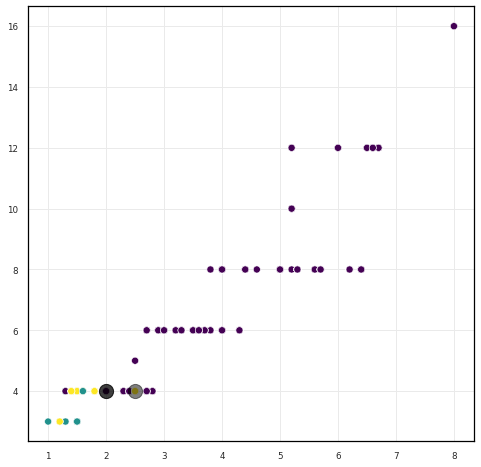

In [ ]:
labels = pairwise_distances_argmin(X_values, centers)

sns.scatterplot(X_values[:, 0], X_values[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
## PCA Analysis

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.587177,-0.868581,-0.745569,-1.041347,-0.858565,0.731844,1.001713,-1.008761,-0.123292,-0.975696,1.065224,2.557405,-0.794835,-0.31827,-0.307974
1,0.205462,0.143411,-0.401276,0.674512,-0.021013,-0.174137,-0.217820,-1.008761,-0.123292,-0.975696,1.065224,2.557405,-0.794835,-0.31827,-0.307974
2,-0.875409,-0.868581,-0.429967,-0.318880,-0.404891,0.214141,0.391946,0.744383,-0.123292,-0.975696,1.065224,-0.391021,1.258123,-0.31827,-0.307974
3,-0.875409,-0.868581,-0.343894,-0.093109,-0.265299,-0.044711,0.391946,0.744383,-0.123292,-0.975696,1.065224,-0.391021,1.258123,-0.31827,-0.307974
4,-0.875409,-0.868581,-0.372585,-0.589805,-0.439789,0.214141,0.391946,1.328765,-0.123292,-0.975696,1.065224,-0.391021,1.258123,-0.31827,-0.307974


Text(0, 0.5, 'Explained Variance Ratio')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


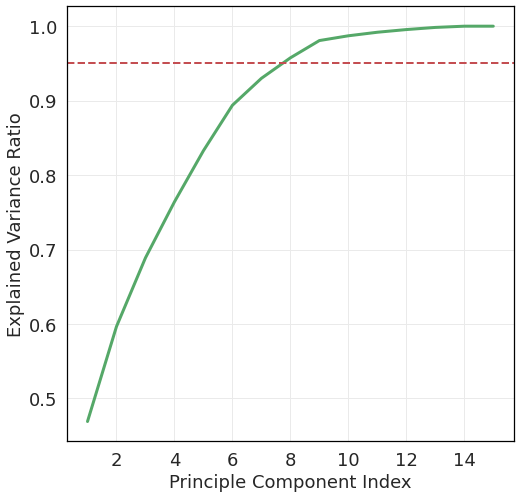

In [ ]:
strPCA = []
nCompPca = []
for x in range (1, X.shape[1] + 1):
  pca = PCA(n_components=x)
  X_pca = pca.fit_transform(X)
  strPCA.append (pca.explained_variance_ratio_.sum())
  nCompPca.append(x)
plt.plot(nCompPca,strPCA,linewidth=3.0, color = 'g')

plt.axhline(0.95, color='r', linestyle='dashed',linewidth=2)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('Principle Component Index', fontsize=18)
plt.ylabel('Explained Variance Ratio',fontsize=18 )


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


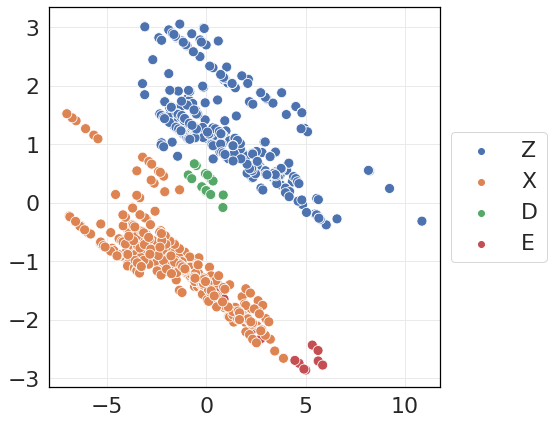

In [ ]:
sns.set(font_scale=2, rc={"figure.figsize": (7, 7)}, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rc("grid", color="#eaeaea")
plt.rcParams["font.family"] = "Arial"
plt.rcParams["svg.fonttype"] = "none"

g = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["fuel_type"], s=100)
g.legend(loc="center left", bbox_to_anchor=(1, 0.5))


In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

X_values = df[["engine_size", "cylinders", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_rating", "smog_rating"]].values
X_values2 = df[["fuel_consumption"]].values
X_values3 = df[["engine_size", "cylinders", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_rating", "smog_rating"]].values

y_values = df[["co2_emissions"]].values

X_values = np.concatenate((X_values, pd.get_dummies(df["fuel_type"], drop_first=True).values), axis=1) # Includes dummy of Fuel Type
X_values = np.concatenate((X_values, pd.get_dummies(df["transmission"], drop_first=True).values), axis=1) # Includes dummy of Fuel Type

X = scaler.fit_transform(X_values)
X2 = scaler.fit_transform(X_values2)
X3 = scaler.fit_transform(X_values3)
y = scaler.fit_transform(y_values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

output = []
for label, X_data in [("Data 1", X2), ("Data 2", X3), ("Data 3", X)]:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.33, random_state=0)
    for random_state in range(0, 50):
      models = [
        ("Decision Tree (Depth=3)", DecisionTreeRegressor(max_depth=3, random_state=random_state)),
        ("Decision Tree (Depth=4)", DecisionTreeRegressor(max_depth=4, random_state=random_state)),
        ("Linear Regression", LinearRegression()),
        ("Gradient Boosting", GradientBoostingRegressor(random_state=random_state)), # https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
        ("AdaBoostRegressor (Default)", AdaBoostRegressor(random_state=random_state)),
        ("AdaBoostRegressor (DT)", AdaBoostRegressor(DecisionTreeRegressor(max_depth=4, random_state=random_state), n_estimators=300, random_state=random_state))
      ]
      for name, model in models:
          reg = model.fit(X_train, np.ravel(y_train))

          y_pred = reg.predict(X_test)
          output.append({
              "name": name,
              "label": label,
              "r2_score": r2_score(y_test, y_pred),
              "explained_variance_score": explained_variance_score(y_test, y_pred)
          })

In [ ]:
pd.DataFrame(output).groupby(["name", "label"]).agg({"r2_score": "mean"})

r2_score
name                        label           
AdaBoostRegressor (DT)      Data 1  0.925554
                            Data 2  0.981890
                            Data 3  0.981936
AdaBoostRegressor (Default) Data 1  0.912759
                            Data 2  0.968150
                            Data 3  0.968643
Decision Tree (Depth=3)     Data 1  0.910047
                            Data 2  0.931640
                            Data 3  0.931640
Decision Tree (Depth=4)     Data 1  0.930476
                            Data 2  0.969128
                            Data 3  0.969136
Gradient Boosting           Data 1  0.937356
                            Data 2  0.985278
                            Data 3  0.988216
Linear Regression           Data 1  0.916972
                            Data 2  0.961004
                            Data 3  0.997878

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


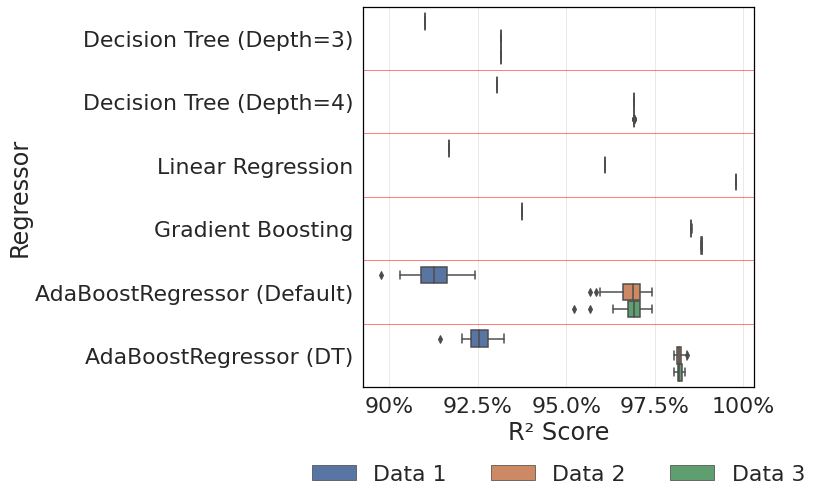

In [ ]:
g = sns.boxplot(x="r2_score", y="name", hue="label", data=pd.DataFrame(output))
g.set_ylabel("Regressor")
g.set_xlabel("R² Score")

g.set_xticklabels([f"{round(x * 100, 1) if (x * 100) % 2 != 0 else int(x * 100)}%" for x in g.get_xticks()])

for i in range(5):
    g.axhline(i + 0.5, color='red', lw=1, alpha=0.5)

g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=False, frameon=False, shadow=False, ncol=5)

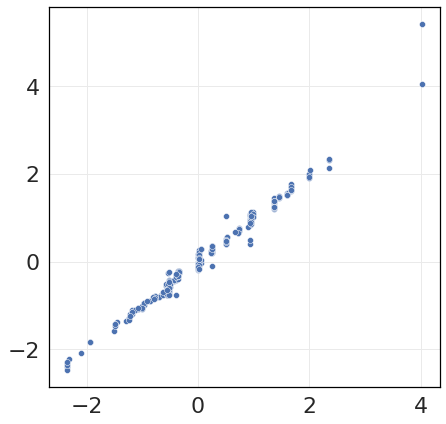

In [ ]:
sns.scatterplot(x=np.ravel(y_pred), y=np.ravel(y_test))
